<s># Day 22 Part 1 In-class Assignment: Modeling forest fires with an Agent-based Model</s>

### <p style="text-align: right;"> &#9989; Andrew.</p>

#### <p style="text-align: right;"> &#9989; Put your group member names here.</p>

##Hello!
I accidentally did a lot of Day 23's stuff on day 22. You can decide if you want to give me credit or not!

<img src="https://cdn-images-1.medium.com/max/2000/1*VO9nuzrJ9XseMyxdtPh_vg.jpeg" width=500>

In [39]:
# standard includes
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

# Next we are going to import some specific libraries we will use to get the animation to work cleanly
from IPython.display import display, clear_output
import time  

In [40]:
# Function plotgrid() does what??

def plotgrid(myarray):
    
    # 
    x_range = np.linspace(0, myarray.shape[1]-1, myarray.shape[1]) 
    y_range = np.linspace(0, myarray.shape[0]-1, myarray.shape[0]) # repeat for the y/vertical axis
    
    # 
    x_indices, y_indices = np.meshgrid(x_range, y_range)
    
    # 
    tree_x = x_indices[myarray == 1];   
    tree_y = y_indices[myarray == 1]; 
    fire_x = x_indices[myarray == 2];   
    fire_y = y_indices[myarray == 2]; 
    
    # 
    plt.plot(tree_x, myarray.shape[0] - tree_y - 1, 'gs',markersize=10)   
    plt.plot(fire_x, myarray.shape[0] - fire_y - 1, 'r^',markersize=10)  # repeat for indices with fire 2
    
    # 
    plt.xlim([-1,myarray.shape[1]])
    plt.ylim([-1,myarray.shape[0]]) 

    # 
    plt.tick_params(axis='both', which='both',
                    bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labelleft=False)

In [41]:
def set_board(board_size=50,f_trees_start=0.5):
    '''
    Creates the initial game board.

    Inputs:
        board_size: length of one edge of the board
        f_trees_start: probability that a given cell is a tree
                       (effectively the tree density)

    Outputs a 2D numpy array with values set to either 0, 1, or 2
        (empty, tree, or fire)
    '''
    
    # all cells initialized to 'empty' (0) by default
    game_board = np.zeros((board_size,board_size),dtype='int64')
    
    # loop over board and roll the dice; if the random number is less
    # than f_trees_start, make it a tree.
    for i in range(board_size):
        for j in range(board_size):
            if rand.random() <= f_trees_start:
                game_board[i,j] = 1

    # set the whole left edge of the board on fire. We're arsonists!
    game_board[:,0] = 2
    
    return game_board

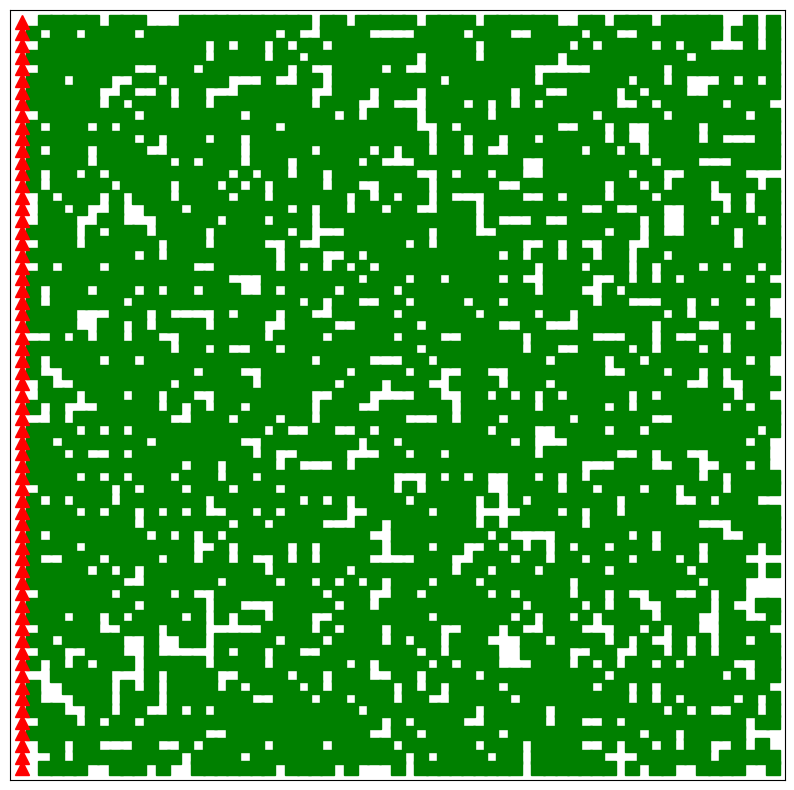

In [73]:
# put your test code here. Make a plot to check it.
# we're going to define a default figure size for you to make things look nice
fig = plt.figure(figsize=(10,10))
big_board = set_board(board_size=65, f_trees_start = 0.75)
plotgrid(big_board)

In [44]:
#Finish this code
# Finish this code
def onBoard(i, j, image):
    ni = image.shape[0] # number of pixels (height)
    nj = image.shape[1] # number of pixels (width)
    if i <= ni-1 and i >= 0 and j <= nj-1 and j>=0: # You need some more conditions here! 
                                         # We've checked i, but what about j?
        return True
    else:
        return False
    
def getNeighborValues(i,j, zebra_array):
    # The following list contains the indices of the neighbors for a pixel at (i.j)
    # But remember, we need to check if the neighbor is on the board when we try to get its value!
    neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if onBoard(neighbor[0],neighbor[1],zebra_array):
            neighbor_values.append(zebra_array[neighbor])
        #else:
        #    neighbor_values.append(-1)
    #print(neighbor_values)
    return neighbor_values

In [45]:
def advance_board(game_board):
    '''
    Advances the game board using the given rules.
    Input: the initial game board.
    Output: the advanced game board
    '''
    ni = game_board.shape[0] # number of pixels (height)
    nj = game_board.shape[1] # number of pixels (width)
    
    # create a new array that's just like the original one, but initially set to all zeros (i.e., totally empty)
    new_board = np.zeros_like(game_board)
    
    # loop over each cell in the board and decide what to do.
    # You'll need two loops here, one nested inside the other.
    for i in range(ni):
        for j in range(nj):
            # Now that we're inside the loops we need to apply our rules
        
            # if the cell was empty last turn, it's still empty.
            # if it was on fire last turn, it's now empty.
            if game_board[i,j] == 1:
                neigbors = getNeighborValues(i,j,game_board)
                if any(neigbor == 2 for neigbor in neigbors):
                    new_board[i,j] = 2
                else:
                    new_board[i,j]=1
            elif game_board[i,j] == 2:
                new_board[i,j] = 0    

    # return the new board
    return new_board

In [46]:
def create_firelist(game_board):
    firelist = []
    ni = game_board.shape[0]
    nj = game_board.shape[1]
    for i in range(ni):
        for j in range(nj):
            if game_board[i,j] == 2:
                firelist.append((i,j))
    return firelist


In [47]:
firelist = create_firelist(big_board)


In [48]:
def locate_neighbors(i,j):
    return [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]


In [49]:
def fast_advance_board(game_board,firelist):
    '''
    Advances the game board quickly.
    Input: the initial game board and locations that will need updates.
    Output: the advanced game board and new update locations
    '''

    new_fire = []

    for i,j in firelist:
        #print(i,j)
        neigbors = locate_neighbors(i,j)
        
        for neighbor in neigbors:
            if onBoard(neighbor[0],neighbor[1],game_board):
                if game_board[neighbor[0],neighbor[1]] == 1:
                    game_board[neighbor[0],neighbor[1]] = 2
                    new_fire.append((neighbor[0],neighbor[1]))
        game_board[i,j] = 0
    #print(len(firelist))
    #print(len(new_fire))
    # return the new board
    return game_board, list(set(new_fire))

#### &#9989;&nbsp; 3.2 As good coders, we always test our new functions! Test your function above and make sure it works! 

Run the code a few times to see whether fire advances according to the rules. You can start with any sort of initial board that you want, you can even just use the default board for the purpose of testing. Remember the advance_board function only advances one step in time. 

In [50]:
import time
from IPython.display import display, clear_output

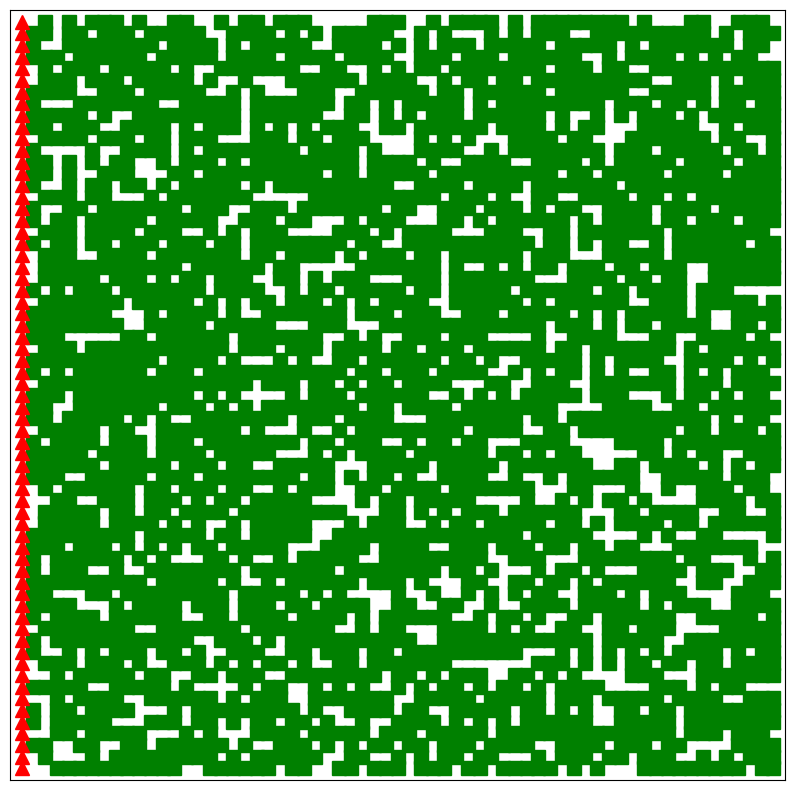

In [74]:
# Initialize a new board here
fig = plt.figure(figsize=(10,10))
big_board = set_board(board_size=65, f_trees_start = 0.70)
plotgrid(big_board)


In [68]:
fire_list = firelist
big_board, firelist = fast_advance_board(big_board, fire_list)

In [77]:
input_size = 65
percent_trees = .65

big_board = set_board(board_size=input_size, f_trees_start = percent_trees)


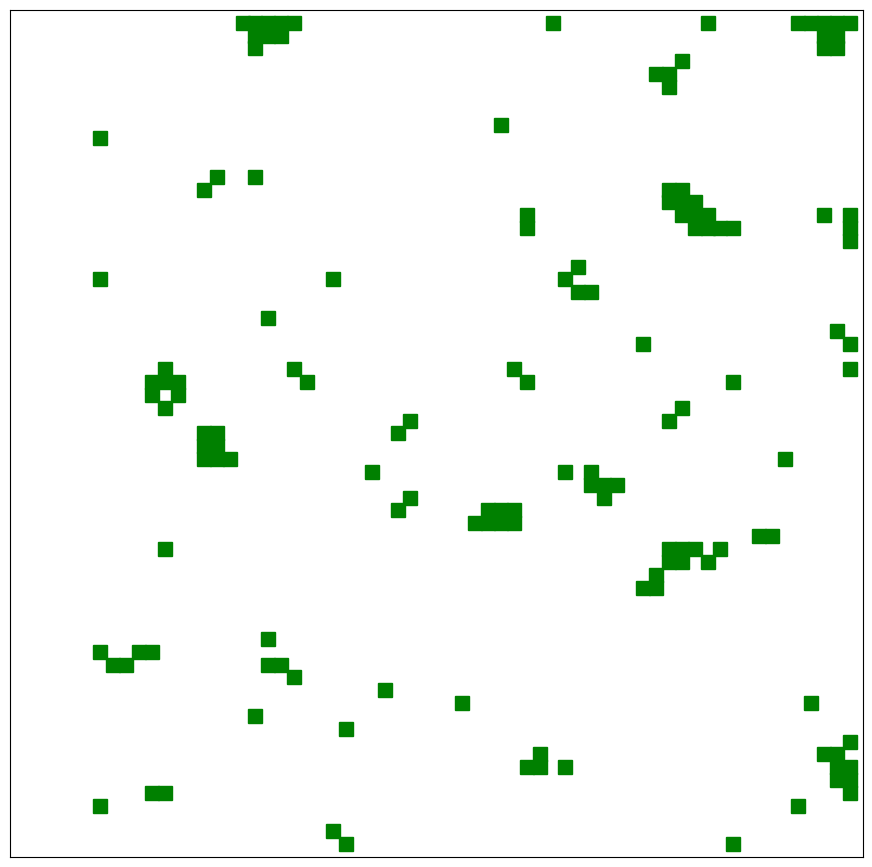

0
with a board size of 65 and 65.0 % tree covering, 2682 trees became 144 a 94 % drop


In [78]:


fig = plt.figure(figsize=(11,11))

firelist = create_firelist(big_board)

tree_i = len(big_board[big_board == 1])

while len(firelist) != 0: 
    #inputs = firelist
    big_board, firelist = fast_advance_board(big_board, firelist)
    
    plotgrid(big_board)   
    
    # Animation part 
    #time.sleep(0.1)         # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    print(len(firelist))
tree_f = len(big_board[big_board == 1])

print('with a board size of', input_size, 'and', percent_trees * 100, '% tree covering,', tree_i, 'trees became', tree_f, 'a', int((1-tree_f/tree_i)*100), '% drop')

plt.close()                 # Close dynamic display

In [56]:
from scipy.optimize import curve_fit
def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

def gompertz_function(x, a, b, c):
    return a * np.exp(-b * np.exp(-c * x))

/tmp/ipykernel_5206/1655852282.py:3: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))


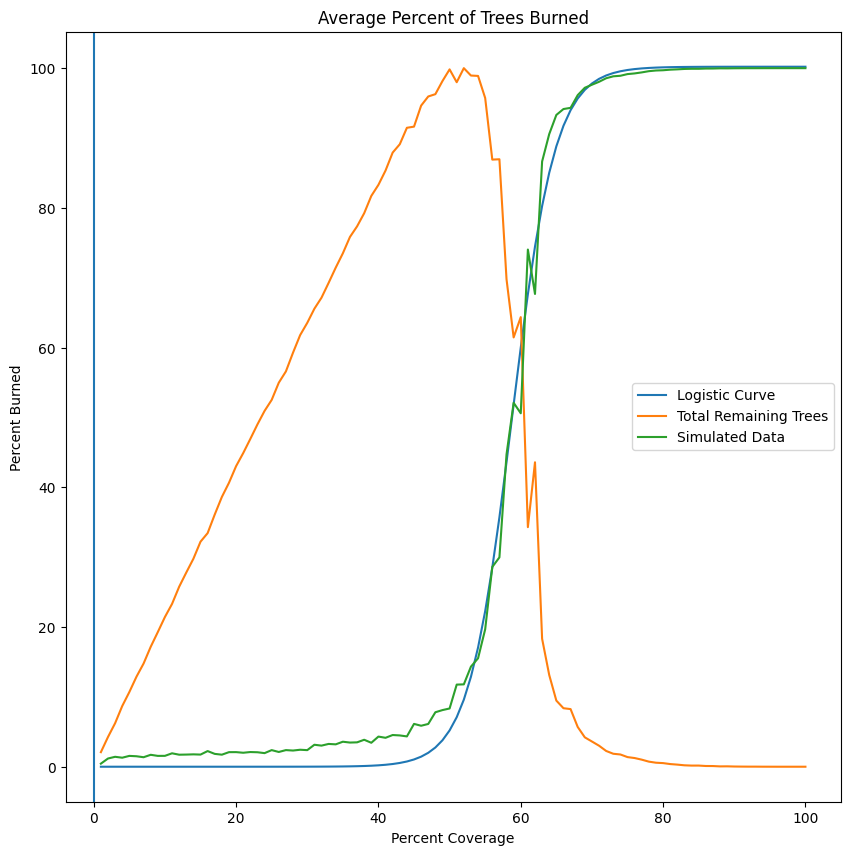

Total Remaining Trees represents how full the board is after the fire is finished


In [81]:
percent_list = np.arange(.01, 1.01, 0.01)
fig = plt.figure(figsize=(10,10))
all_lists = []
total_vals_lists = []

for i in range(20):
    percent_drop = []
    tovals = []
    for percentage in percent_list:
        input_size = 70
        percent_trees = percentage

        big_board = set_board(board_size=input_size, f_trees_start = percent_trees)
        firelist = create_firelist(big_board)

        tree_i = len(big_board[big_board == 1])

        if tree_i != 0:
            while len(firelist) != 0: 
                big_board, firelist = fast_advance_board(big_board, firelist)

            tree_f = len(big_board[big_board == 1])
            percent_drop.append((1-tree_f/tree_i)*100)
            tovals.append(tree_f)
        else:
            percent_drop.append(0)
            tovals.append(0)
        
        #plotgrid(big_board)   
        #clear_output(wait=True) # Clear output for dynamic display
        #display(fig)            # Reset display
        #fig.clear()
    all_lists.append(percent_drop)
    total_vals_lists.append(tovals)
array_list = np.column_stack(all_lists)
array_tovals = np.column_stack(total_vals_lists)
row_averages = np.mean(array_list, axis=1)
toval_averages = np.mean(array_tovals, axis = 1)
toval_unitless = toval_averages/toval_averages.max()*100
#analysis
popt, pcov = curve_fit(logistic_function, percent_list*100, row_averages, maxfev=10000)
L, k, x0 = popt

y_fit = logistic_function(percent_list*100, *popt)

#popt1, pcov1 = curve_fit(gompertz_function, percent_list*100, row_averages, maxfev=10000)
#L1, k1, x01 = popt1

y_fit = logistic_function(percent_list*100, *popt)
#y_fit1 = gompertz_function(percent_list*100, *popt1)

plt.plot(percent_list*100,y_fit,label='Logistic Curve')
#plt.plot(percent_list*100,y_fit1,label='Gompertz Curve')
plt.plot(percent_list*100,toval_unitless,label='Total Remaining Trees')
plt.plot(percent_list*100,row_averages,label='Simulated Data')
plt.title('Average Percent of Trees Burned')
plt.xlabel('Percent Coverage')
plt.ylabel('Percent Burned')
plt.axvline()
plt.legend()
plt.show()
print('Total Remaining Trees represents how full the board is after the fire is finished')

In [58]:
print(popt)

[99.9412469   0.38253332 59.08832495]


In [61]:
# This lets us make and clear plots without creating new ones
from IPython.display import display, clear_output

# We can use this to have images show up with some user-specified spacing in time
import time 

# Create a figure
fig = plt.figure(figsize=(10,10))

# Run animation for 10 iterations
while (big_board==2).any(): 
    
    big_board = advance_board(big_board)
    plotgrid(big_board)   
    
    # Animation part 
    #time.sleep(0.1)         # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots

plt.close()                 # Close dynamic display

## To be clear, I didn't come to class on Tuesday
But the overlap between this code I did on my own time and the actual class made me decide to turn it in anyways

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [82]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---


## Congratulations, you're done!

Submit this assignment by uploading your notebook and the pictures of your model planning session to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University